In [1]:
import glob

import numpy as np
import pandas as pd

import torch
from torch import nn

import matplotlib.pyplot as plt

In [2]:
shot_types = 9
other_metrics = 1
total_metics = 10

In [3]:
def plot_swing(swing_data):
    """
    swing_data: Dx6 array of IMU data
    """
    
    columns = ["Ax", "Ay", "Az", "Gx", "Gy", "Gz"]
    plt.figure(figsize=(15,7))
    for idx, line in enumerate(swing_data):
        plt.subplot(2,3,idx+1)
        plt.title(columns[idx])
        plt.plot(line)

In [88]:
X_data = []
y_data = []
for filename in glob.glob("./data/*.csv"):
    x = pd.read_csv(filename).drop(columns="Unnamed: 0")
    y = np.zeros(total_metics)
    y[x["shot_type"][0]] = 1
    y[-1] = x["distance"][0]
#     plot_swing(x.values[:, :-2].T)
    X_data.append(x.values[:, :-2].T)
    y_data.append(y)


In [89]:
# NxCxD
X = np.array(X_data)

# Nx10
y = np.array(y_data)

In [110]:
X[0][0].shape

(2285,)

In [111]:
swing_peak = np.argmax(np.abs(X[0][0]))

1408

In [125]:
swing_peak_idx = np.argmax(np.abs(X[0][0]))
window = 350

700

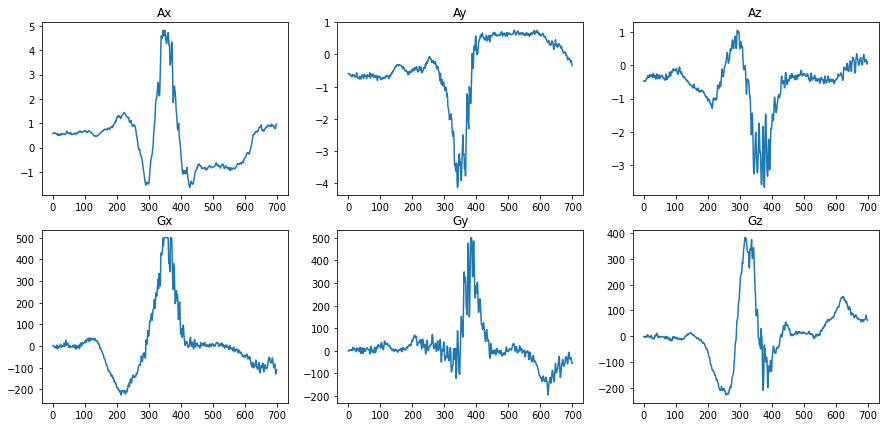

In [126]:
plot_swing(X[0][:, swing_peak_idx-window : swing_peak_idx+window])

In [21]:
X.shape, y.shape

((1, 6, 2285), (1, 10))

In [62]:
class BadModel(nn.Module):

    def __init__(self):
        super(BadModel, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(6, 1, kernel_size=9, stride=99, padding=1), # lol
            nn.ReLU(True)
        )
        self.dense = nn.Linear(24, total_metics)
        
    def forward(self, x):
        return self.dense(self.conv(x))

In [63]:
model = BadModel()

In [67]:
model(torch.from_numpy(X).float()).shape

torch.Size([1, 1, 10])